In [ ]:
#実践12-1 (pandasの復習)
'''「7. 予測モデルの評価」で実行したclassification_reportをdataframeに格納してください。
行名・列名もわかるようにしてください。その後csvとして保存してください。
実務でもdataframeに格納してcsvへ保存するケースはあります。'''

import pandas as pd
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = dataset.target

X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

# 分類レポートの生成・DataFrameに変換
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# CSVとして保存
report_df.to_csv('classification_report.csv', index=True)

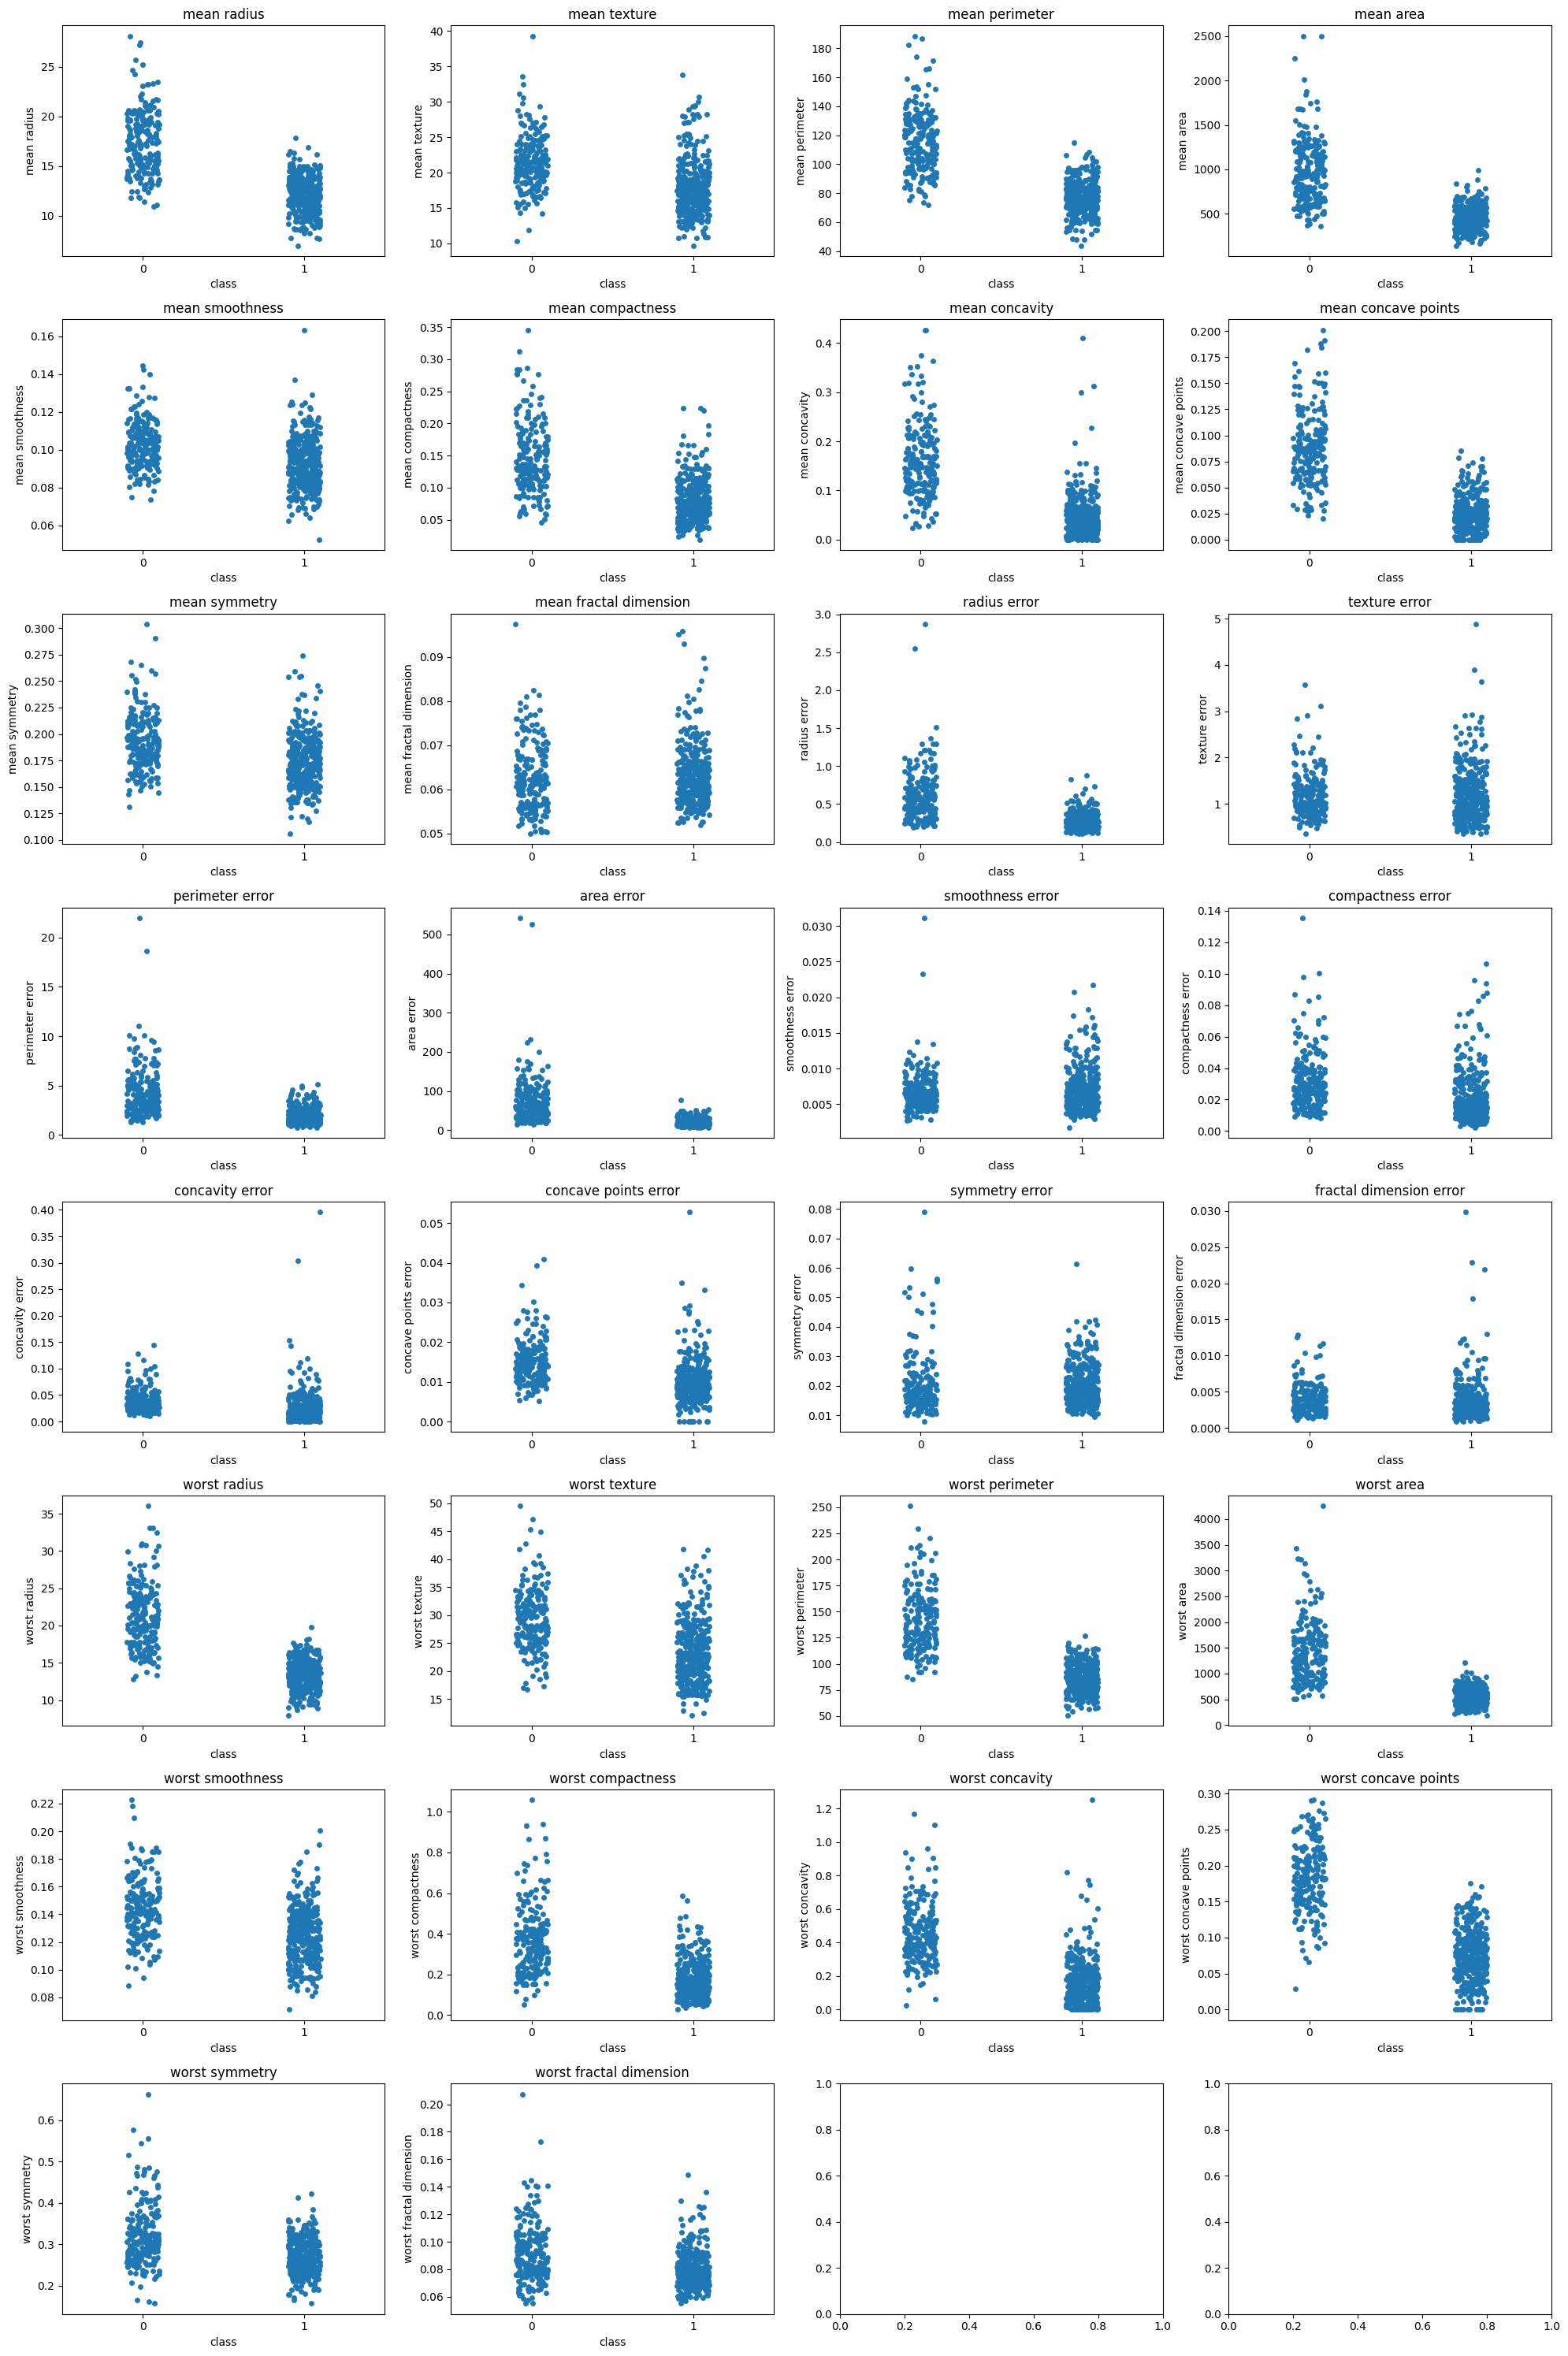

In [ ]:
#践12-2(matplotlib, seabornの復習 & 一部発展)
'''load_breast_cancerを講義テキストでは
df.hist(figsize=(20, 15), bins=30)
として実施しました。
これをseabornのstripplotを使って同様に表示してください。
その際、全特徴量を1つのfigとして表示し、図を保存してください。
ポイント: subplotsを用いること & for文を使ってstripplotをおこなう。
参考) 実務でもこのように全特徴量に対して一斉の可視化を行うケース
(pandasの可視化だけでは対応できないケース)はあります。
一度ロジックを組み立てておけば汎用的に使えるので覚えておくと便利です。
更に発展させると、この処理のベースを関数/クラスのメソッド化しておき、
dataframeを渡すだけにしておくと更に利便性が高まります。'''


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = dataset.target

# stripplotの描画
fig, axes = plt.subplots(8,4, figsize=(20, 30))
axes = axes.flatten()

# feature_nameごとにグラフを書く・保存
for i, col in enumerate(dataset.feature_names):
    sns.stripplot(x='class', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.savefig('stripplot_all_features.png')
plt.show()


In [ ]:
#実践12-3
'''「7. 予測モデルの評価」の流れで混同行列を作成し表示してください。
(classification_reportの元となる行列で実務でも利用します)
混同行列をdataframe(index, column名付与)して表示・保存してください。'''


import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = dataset.target
X = df.drop(columns=['class']).to_numpy()
y = df['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 混同行列の作成
conf_matrix = confusion_matrix(y_test, y_pred)

# DataFrameに変換・表示・保存
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
print("混同行列:")
print(conf_matrix_df)

conf_matrix_df.to_csv('confusion_matrix.csv', index=True)





混同行列:
                 Predicted Negative  Predicted Positive
Actual Negative                  59                   4
Actual Positive                  11                  97


In [7]:
#実践12-4(マルチクラス分類)
'''irisデータを取得してください。
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
irisデータに対して学習・推論を実施してください。モデルは任意で構いませんが、
木構造以外のアルゴリズムの場合は標準化を視野に入れてください(厳密にはデータによっては標準化が不要な場合もありますが、基本は実施すべきです)。木構造の場合はexport_text等で条件分岐を出力してください。
混同行列や評価指標を算出してください。'''

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier(random_state=3)
model.fit(X_train, y_train)
Xtest_scaled = scaler.fit_transform(X_test)
y_pred = model.predict(Xtest_scaled)

# 混同行列の作成
conf_matrix = confusion_matrix(y_test, y_pred)

# DataFrameに変換・表示
conf_matrix_df = pd.DataFrame(conf_matrix, index=iris.target_names, columns=iris.target_names)
print("混同行列:")
print(conf_matrix_df)

# 分類レポートの生成
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\n分類レポート:")
print(report)


混同行列:
            setosa  versicolor  virginica
setosa          17           0          0
versicolor      14           0          0
virginica        2          11          1

分類レポート:
              precision    recall  f1-score   support

      setosa       0.52      1.00      0.68        17
  versicolor       0.00      0.00      0.00        14
   virginica       1.00      0.07      0.13        14

    accuracy                           0.40        45
   macro avg       0.51      0.36      0.27        45
weighted avg       0.51      0.40      0.30        45

